<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/TwoNN_Pythn_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i= 0 train acc, test acc | 0.5015, 0.59
i= 200 train acc, test acc | 0.5015, 0.59
i= 400 train acc, test acc | 0.5015, 0.59
i= 600 train acc, test acc | 0.4985, 0.41
i= 800 train acc, test acc | 0.5015, 0.59
i= 1000 train acc, test acc | 0.4985, 0.41
i= 1200 train acc, test acc | 0.5015, 0.59
i= 1400 train acc, test acc | 0.5015, 0.59
i= 1600 train acc, test acc | 0.4985, 0.41
i= 1800 train acc, test acc | 0.5015, 0.59
i= 2000 train acc, test acc | 0.4985, 0.41
i= 2200 train acc, test acc | 0.4985, 0.41
i= 2400 train acc, test acc | 0.5015, 0.59
i= 2600 train acc, test acc | 0.4985, 0.41
i= 2800 train acc, test acc | 0.5015, 0.59
i= 3000 train acc, test acc | 0.4985, 0.41
i= 3200 train acc, test acc | 0.4985, 0.41
i= 3400 train acc, test acc | 0.4985, 0.41
i= 3600 train acc, test acc | 0.4985, 0.41
i= 3800 train acc, test acc | 0.4985, 0.41
i= 4000 train acc, test acc | 0.5015, 0.59
i= 4200 train acc, test acc | 0.5015, 0.59
i= 4400 train acc, test acc | 0.5015, 0.59
i= 4600 train acc,

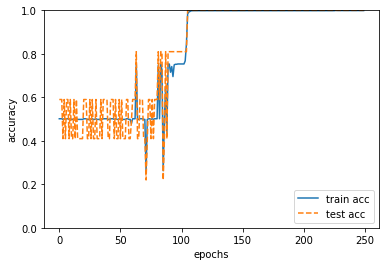

W1 =  [[-7.82366048 -6.16056831]
 [-7.49818325 -6.28877902]]
b1 =  [3.8531252  9.22117961]
W2 =  [[-13.56623565]
 [ 13.1948449 ]]
b2 =  [-6.13852073]


In [7]:
#################################################################
# Two-Layer NN (XOR 구현))
#################################################################
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    
def relu(x):
   return np.maximum(0, x) 

def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad




def cross_entropy_error(y, t):
      if y.ndim ==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)   
    
      batch_size = y.shape[0]
      delta = 1e-7
      #기존 것 그대로 사용시 0일 경우의 확률이 적용되지 않는 문제 발생
      return -np.sum(t*np.log(y+delta) + (1.0-t)*np.log(1.0-y+delta)) / batch_size

def function_L1(x,y):
  check = x + 0.5
  if check < y:
    return 0
  else:
    return 1

def function_L2(x,y):
  check = x - 0.5
  if check < y:
    return 0
  else:
    return 1

def xor_result(x,y):
  if x == y:
    return 0
  else:
    return 1

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        
        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)

        # 그냥 있는 그대로 사용시 true/false로 나와서 적용 불가능 하므로 숫자 형태로 변경 필요
        y = (y > 0.5).astype(int)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
   
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        
        # backward
        # 실제 미분 적용시 여기에서도 dy가 그대로 적용되므로 변경 필요 없음
        dy = (y - t) / batch_num       
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads  

# 데이터 적용
rand_bin = np.random.choice(2, 2000)
rand_bin2 = np.random.choice(2, 2000)

#노이즈를 추가시켜서 적합한 여러 데이터들을 적용할 수 있도록 진행
x1 = rand_bin + np.random.randn(*rand_bin.shape) * 0.1
x2 = rand_bin2 + np.random.randn(*rand_bin.shape) * 0.1

x_train = np.matrix(np.column_stack((x1, x2)))
x_train = np.asarray(x_train)
target_train = np.logical_xor(rand_bin, rand_bin2).astype(int)
t_train = target_train.reshape(-1, 1)


rand_bin = np.random.choice(2, 100)
rand_bin2 = np.random.choice(2, 100)

x_test = np.matrix(np.column_stack((rand_bin, rand_bin2)))
x_test = np.asarray(x_test)
target_test = np.logical_xor(rand_bin, rand_bin2).astype(int)
t_test = target_test.reshape(-1, 1)



network = TwoLayerNet(input_size=2, hidden_size=2, output_size=1)

# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 10   # 미니배치 크기, 1로 해도 충분히 좋은 결과가 나온다
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
      
    #print("x_batch = ", x_batch, "t_batch = ", t_batch)
   
    y=network.predict(x_batch)
    by = (y > 0.5).astype(int)
    #print("output = ", y, "bin = ", by)        
   
    #print('W1 =', network.params['W1'])
    #print('b1 =', network.params['b1'])
    a1 = np.dot(x_batch, network.params['W1']) + network.params['b1']
    #print('a1 =', a1)
    
    # 기울기 계산network.params['W1']
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    #print("gradient = ")
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        #print(learning_rate * grad[key])
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    #print('loss = ', loss)
    #print(network.params['W1'])
    #print(network.params['W2']) 
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i=", i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

print('W1 = ', network.params['W1'])
print('b1 = ', network.params['b1'])
print('W2 = ', network.params['W2'])
print('b2 = ', network.params['b2'])

In [8]:
#
# Sample Test
#
x=[1, 1]

out = network.predict(x)
out

array([0.00355555])